Что больше всего влияет на отстутствия сотрудников

Цель - просто научиться кодить в питоне, честно

1) Программа загрузки, предобработки и очистки данных
2) Корреляционный анализ
3) Кластерный анализ
4) Визуализация данных
5) Выводы
6) Источники (stack overflow, умные знакомые, курсы на курсере, божья помощь)

Кто: Настя Болотина, Наталия Диасамидзе, Екатерина Шленова, Юля Юрчак


Библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import scipy.stats as ss

1) Программа загрузки, предобработки и очистки данных

In [2]:
path = "https://raw.githubusercontent.com/NDi-ze/python-project/master/datasets_660_1258_MFGEmployees4%20(2).csv"

df = pd.read_csv(path)
df.head() #подключили датасет

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores


Для исследования возьмем следующие факторы, которые могут влиять на время абсенса (очень хочется сказать абсента ибо уже не вывожу, хочу напицца чтоб забыцца)
Gender
City
DepartmentName
StoreLocation
Division
Age
LengthService

и есесна оставим EmployeeNumber и AbsentHours, остальные выкидываем:

In [3]:
df = df.drop(['Surname', 'GivenName', 'JobTitle','BusinessUnit' ], axis = 1) 
df.info() #выкинули лишнее

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 9 columns):
EmployeeNumber    8336 non-null int64
Gender            8336 non-null object
City              8336 non-null object
DepartmentName    8336 non-null object
StoreLocation     8336 non-null object
Division          8336 non-null object
Age               8336 non-null float64
LengthService     8336 non-null float64
AbsentHours       8336 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 586.2+ KB


In [4]:
df.describe()

,EmployeeNumber,Age,LengthService,AbsentHours
count,8336.000000,8336.000000,8336.000000,8336.000000
mean,4168.500000,42.007086,4.782910,61.283978
std,2406.540255,9.939798,2.462990,49.038365
min,1.000000,3.504743,0.012098,0.000000
25%,2084.750000,35.298748,3.575892,19.127590
50%,4168.500000,42.114924,4.600248,56.005808
75%,6252.250000,48.666943,5.623922,94.284692
max,8336.000000,77.938003,43.735239,272.530123


проверка пропущенных значений

In [6]:
df.isnull().values.any()

False

Закодируем переменные, которые object (придадим им числовые значения, чтоб считать потом; превратим из обычной шкалы в порядковую кажется). полностью списала отсюда https://www.kaggle.com/dsloet/absenteeism-visual-and-regression

In [13]:
def mapper(field, new_field):
    keys = field.unique()
    dicts = dict(zip(keys, range(len(keys))))
    print(dicts)
    df[new_field] = field.map(dicts).astype(int)
    
mapper(df.Gender, 'MappedGender')
mapper(df.City, 'MappedCity')
mapper(df.DepartmentName, 'MappedDept')
mapper(df.StoreLocation, 'MappedStoreLoc')
mapper(df.Division, 'MappedDivision')

{'F': 0, 'M': 1}
{'Burnaby': 0, 'Courtenay': 1, 'Richmond': 2, 'Victoria': 3, 'New Westminster': 4, 'Vancouver': 5, 'Sechelt': 6, 'Kamloops': 7, 'North Vancouver': 8, 'Vananda': 9, 'West Vancouver': 10, 'Nanaimo': 11, 'Aldergrove': 12, 'Kelowna': 13, 'Trail': 14, 'Penticton': 15, 'Duncan': 16, 'Crawford Bay': 17, 'Port Hardy': 18, 'Logan Lake': 19, 'Abbotsford': 20, 'Dawson Creek': 21, 'Surrey': 22, 'Squamish': 23, 'Good Hope Lake': 24, 'Sidney': 25, 'Coquitlam': 26, 'Chilliwack': 27, 'Okanagan Mission': 28, 'Ganges': 29, 'Prince George': 30, 'Atlin': 31, 'Whistler': 32, 'Spences Bridge': 33, 'New Westminister': 34, 'Gibsons': 35, 'Vernon': 36, 'Fauquier': 37, 'Mackenzie': 38, 'Gold Bridge': 39, 'Fort Fraser': 40, 'Nelson': 41, 'Kaslo': 42, 'Creston': 43, 'Wynndel': 44, 'Muncho Lake': 45, 'Kitimat': 46, 'Lac La Hache': 47, 'Armstrong': 48, 'Quesnel': 49, 'Hixon': 50, 'Ocean Falls': 51, 'Vallican': 52, 'North Pender Island': 53, 'Montney': 54, 'Burns Lake': 55, 'Midway': 56, 'Westwold':

тут должны быть гипотезы но я хз че писать

Text(0.5, 1.0, 'Absenteeism per Division')

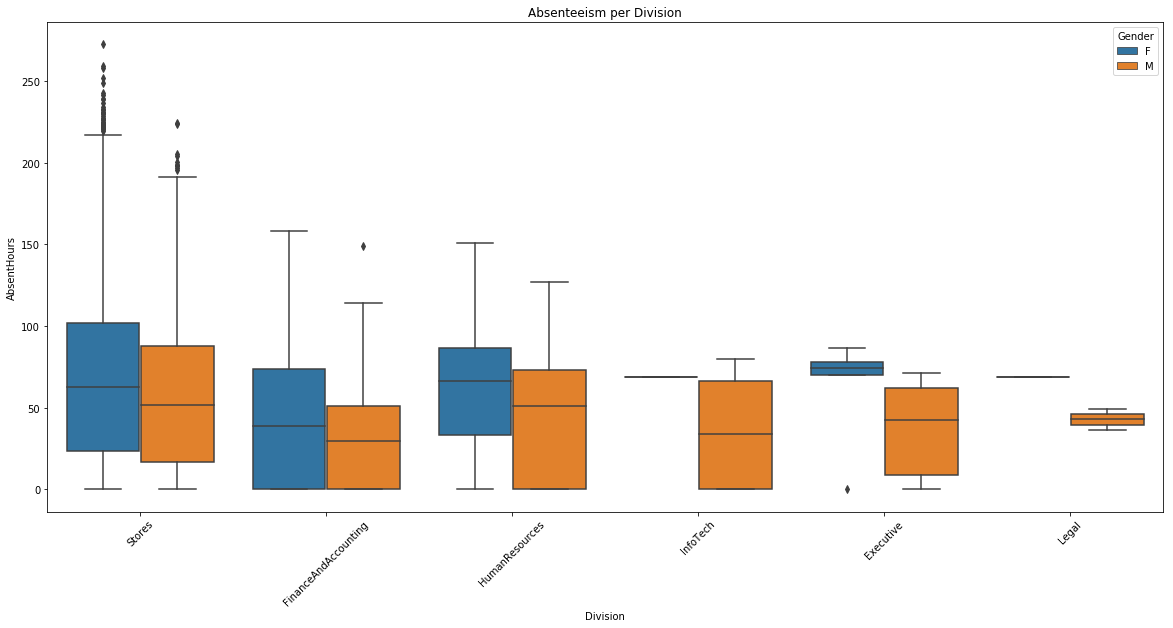

In [14]:
plt.figure(figsize=(20, 9))
sns.boxplot("Division", "AbsentHours", hue="Gender", data=df)
plt.xticks(rotation = 45)
plt.title('Absenteeism per Division')